<a href="https://colab.research.google.com/github/angeruzzi/MachineLearningRef/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN



Dados de Exemplo: Dados pessoais e de custo médico para previsão de custo de seguro ( https://www.kaggle.com/mirichoi0218/insurance )

In [12]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Base de Dados
fonte = 'https://raw.githubusercontent.com/angeruzzi/Datasource/main/exampleDataInsurance.csv'
dados = pd.read_csv(fonte)

#Transformações
#Variável smoker para 0 e 1
dados['smoker'] = dados['smoker'].map({'yes':1, 'no':0})

#Alterar a escala da variável resposta charges (custo) para mil dólares 
dados['charges'] = dados['charges']/1000

#Faremos as análise utilizando apenas 3 variáveis : charges (custo), bmi (indice de massa corporal) e smoker (fumante)
dados = dados[['bmi', 'smoker', 'charges']]

dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


In [20]:
k = 15 #número de vizinhos que serão considerados
eqms_treino = []
eqms_teste = []

#Pegando os dados parao o modelo onde será previsto os custos de seguro de saúde baseados nas variáveis BMI (ICM) e SMOKER (fumante)
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(X, y)
preditos = knn.predict(X)
eqm = mean_squared_error(preditos, y) 
eqm

41.05478286199178

Text(0, 0.5, 'Custo')

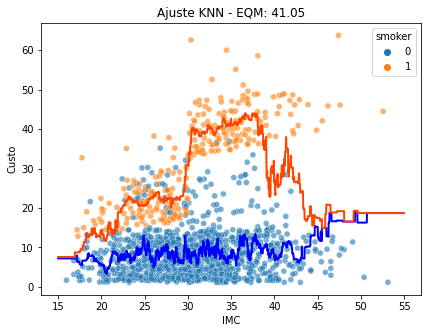

In [19]:
#Gráfico do modelo

x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = knn.predict(c0)
d1 = knn.predict(c1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = X['bmi'], y = y, hue =  X['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN - EQM: ' + str(round(eqm, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  
